# ANALISI DATI ESERCIZIO 6.1

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({'font.size': 16})

In [31]:
sum_prog_m= np.loadtxt("energy_graph_m.txt")
sum_prog_g= np.loadtxt("energy_graph_g.txt")
heat_m=np.loadtxt("cap_graph_m.txt")
heat_g=np.loadtxt("cap_graph_g.txt")
chi_m=np.loadtxt("chi_graph_m.txt")
chi_g=np.loadtxt("chi_graph_g.txt")
mag_m=np.loadtxt("mag_graph_m.txt")
mag_g=np.loadtxt("mag_graph_g.txt")

points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

In questo esercizio calcolo alcune grandezze fisiche del modello di Ising con due diversi algoritmi, Metropolis e Gibbs.

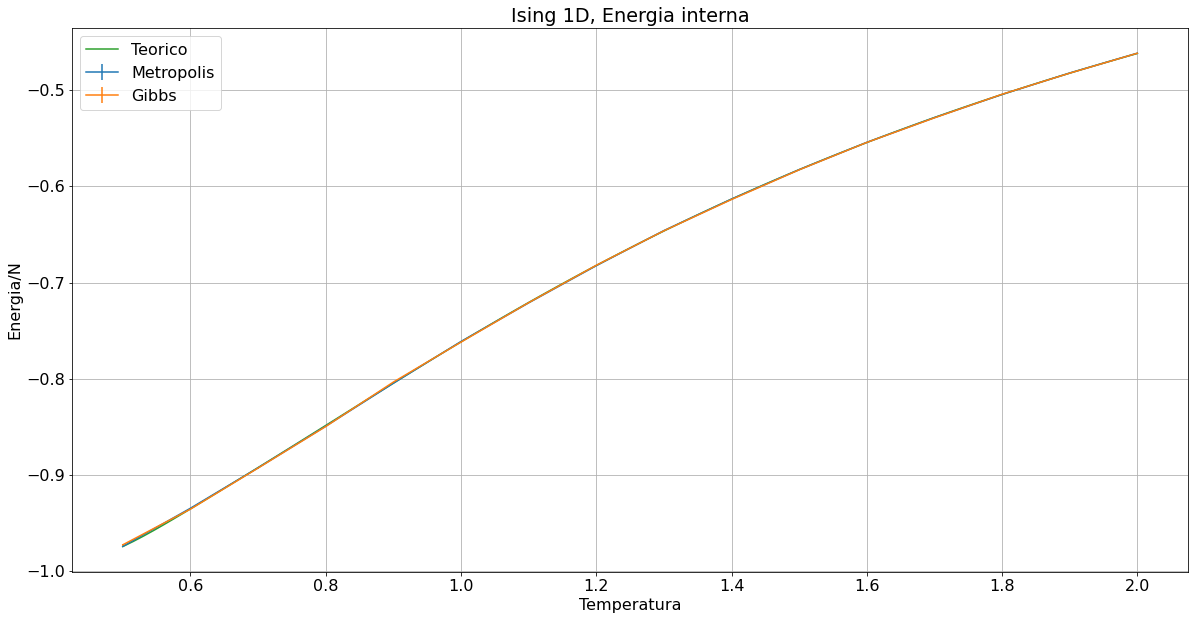

In [32]:
plt.figure(figsize=(20,10));
plt.errorbar(sum_prog_m[:,0],sum_prog_m[:,1],yerr=sum_prog_m[:,2],label='Metropolis')
plt.errorbar(sum_prog_g[:,0],sum_prog_g[:,1],yerr=sum_prog_g[:,2],label='Gibbs')
plt.plot(T, e, label="Teorico")
plt.legend()
plt.grid(True)
plt.title('Ising 1D, Energia interna')
plt.xlabel("Temperatura")
plt.ylabel("Energia/N" )
plt.show()

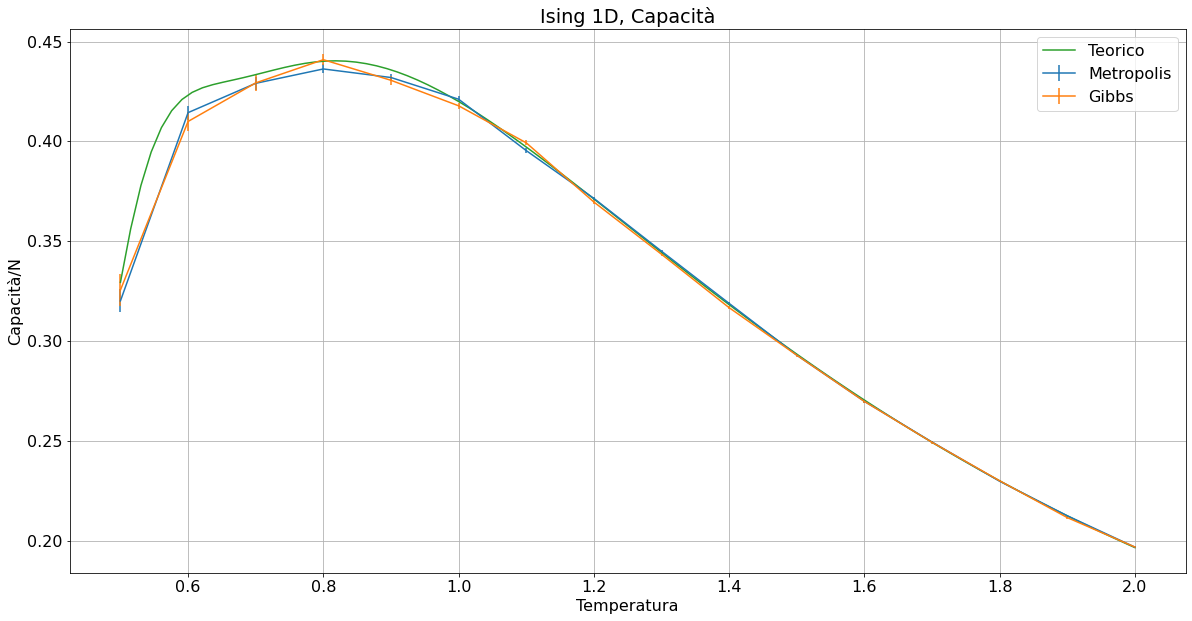

In [33]:
plt.figure(figsize=(20,10))
plt.errorbar(heat_m[:,0],heat_m[:,1],yerr=heat_m[:,2],label='Metropolis')
plt.errorbar(heat_g[:,0],heat_g[:,1],yerr=heat_g[:,2],label='Gibbs')
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label ="Teorico")
plt.legend()
plt.grid(True)
plt.title('Ising 1D, Capacità')
plt.xlabel("Temperatura")
plt.ylabel("Capacità/N" )
plt.show()

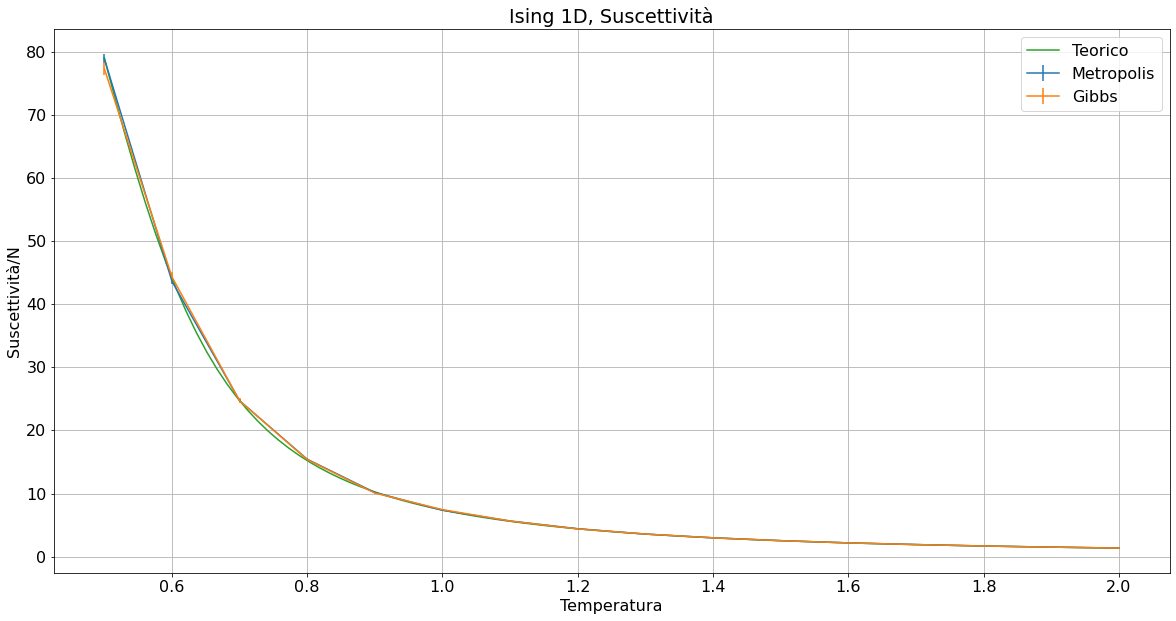

In [34]:
plt.figure(figsize=(20,10))
plt.errorbar(chi_m[:,0],chi_m[:,1],yerr=chi_m[:,2],label='Metropolis')
plt.errorbar(chi_g[:,0],chi_g[:,1],yerr=chi_g[:,2],label='Gibbs')
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label="Teorico")
plt.legend()
plt.grid(True)
plt.title('Ising 1D, Suscettività')
plt.xlabel("Temperatura")
plt.ylabel("Suscettività/N" )
plt.show()



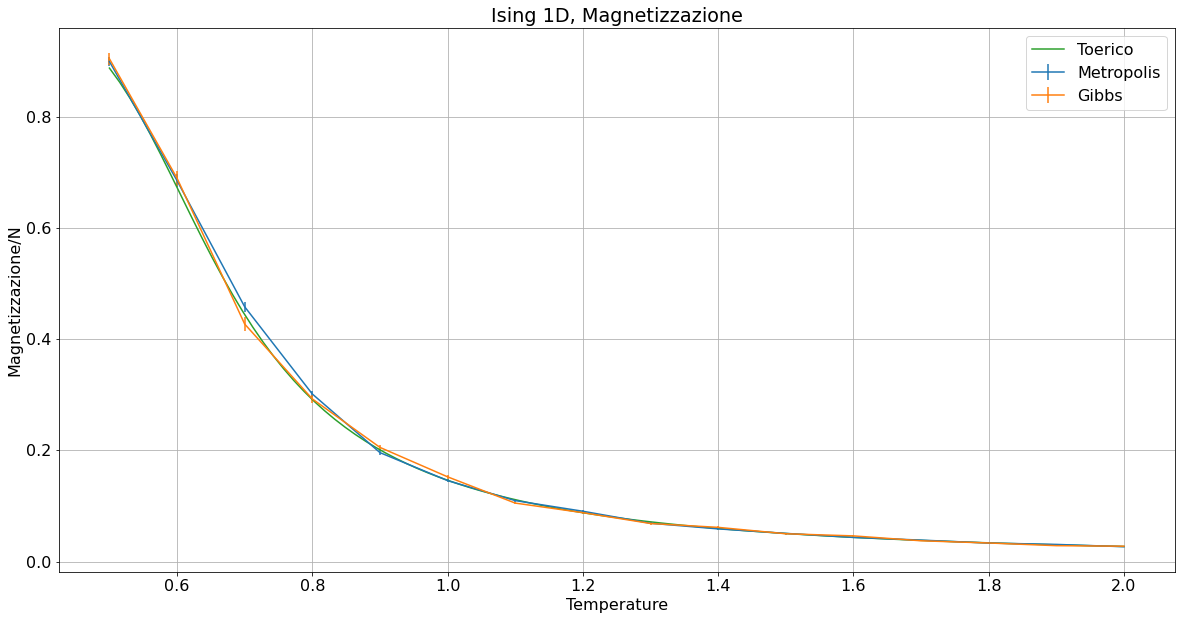

In [35]:
plt.figure(figsize=(20,10))
plt.errorbar(mag_m[:,0],mag_m[:,1],yerr=mag_m[:,2],label='Metropolis')
plt.errorbar(mag_g[:,0],mag_g[:,1],yerr=mag_g[:,2],label='Gibbs')
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, label="Toerico")
plt.legend()
plt.grid(True)
plt.title('Ising 1D, Magnetizzazione')
plt.xlabel("Temperature")
plt.ylabel("Magnetizzazione/N" )
plt.show()

L'algoritmo di ising riesce a stimare bene tutte tre le grandezze fisiche. Ho scelto di calcolare il valore di quest'ultime da 0.5 a 2 gradi.